In [1]:
from DiffusionMaps.DiffusionMaps import DiffusionMaps
from ModifiedPHATE.ModifiedPHATE import ModifiedPHATE
from sklearn.datasets import make_swiss_roll, make_circles, make_s_curve
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from sklearn.manifold import *
from sklearn.decomposition import PCA, KernelPCA
from phate import PHATE
from umap import UMAP
from itertools import product

dist = np.loadtxt("hgdp_distance_matrix")
dist

array([[  0.        , 598.87060547, 597.63531494, ..., 736.52832031,
        735.51342773, 737.4083252 ],
       [598.87060547,   0.        , 601.29193115, ..., 737.17974854,
        736.324646  , 739.10015869],
       [597.63531494, 601.29193115,   0.        , ..., 739.1697998 ,
        736.57720947, 740.34246826],
       ...,
       [736.52832031, 737.17974854, 739.1697998 , ...,   0.        ,
        629.86029053, 684.13085938],
       [735.51342773, 736.324646  , 736.57720947, ..., 629.86029053,
          0.        , 684.19805908],
       [737.4083252 , 739.10015869, 740.34246826, ..., 684.13085938,
        684.19805908,   0.        ]])

In [2]:
alldist = np.tril(dist).ravel()
alldist = alldist[alldist > 0]
np.percentile(alldist, 75)**2

496819.46796883736

In [3]:
methods = {
    "t-SNE": TSNE(metric="precomputed"),
    "PHATE": PHATE(knn_dist="precomputed", verbose=0),
    "UMAP": UMAP(n_components=2, metric="precomputed"),
    "ModifiedPHATE": ModifiedPHATE(knn_dist="precomputed", t=10, knn=5, verbose=0),
    "DiffusionMaps_knn5": DiffusionMaps(metric="precomputed"),
    "DiffusionMaps_knn25": DiffusionMaps(metric="precomputed", knn=25),
    "DiffusionMaps_knn100": DiffusionMaps(metric="precomputed", knn=100),
    "DiffusionMaps_knn100_t5": DiffusionMaps(metric="precomputed", knn=100, t=5),
    "DiffusionMaps_knn100_t25": DiffusionMaps(metric="precomputed", knn=100, t=25),
    "DiffusionMaps_knn100_t100": DiffusionMaps(metric="precomputed", knn=100, t=100),
    "DiffusionMaps_noknn": DiffusionMaps(metric="precomputed", knn=None),
    "DiffusionMaps_noknn_eps496819.": DiffusionMaps(metric="precomputed", knn=None, epsilon=496819.46796883736)

}

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pops = pd.read_csv("pops.csv")
pops

,ID,Sex,population,geographic_origin,region,pop_group
0,HGDP00448,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
1,HGDP00479,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
2,HGDP00985,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
3,HGDP01094,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
4,HGDP00982,M,Mbuti_Pygmies,Democratic_Republic_of_Congo,Subsaharian_Africa,Africa
...,...,...,...,...,...,...
1038,HGDP00953,M,Yakut,Siberia,Asia,Est_Asia
1039,HGDP01070,F,Sardinian,Italy,Europe,Europe
1040,HGDP01376,M,French_Basque,France,Europe,Europe
1041,HGDP00671,M,Sardinian,Italy,Europe,Europe


In [5]:
def factors(n):
    out = []
    for i in range(1, int(n**0.5) + 1):
        if n % i == 0:
            out.append([i, n//i])
    return out

def get_grid(n):
    facs = factors(n)
    diff = list(map(lambda L: abs(L[0] - L[1]), facs))
    min_ind = np.argmin(diff)
    min_grid = facs[min_ind]
    
    if diff[min_ind] > 5:
        return get_grid(n+1)
    
    return min_grid

  0%|          | 0/12 [00:00<?, ?it/s]

/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shussain/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/shussain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: User

k, epsilon used:11, 995256.0601802543


/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


k, epsilon used:11, 995256.0601802543


/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


k, epsilon used:11, 995256.0601802543


/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


k, epsilon used:11, 995256.0601802543


/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


k, epsilon used:11, 995256.0601802543


/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


k, epsilon used:11, 995256.0601802543


/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


k, epsilon used:11, 995256.0601802543


/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


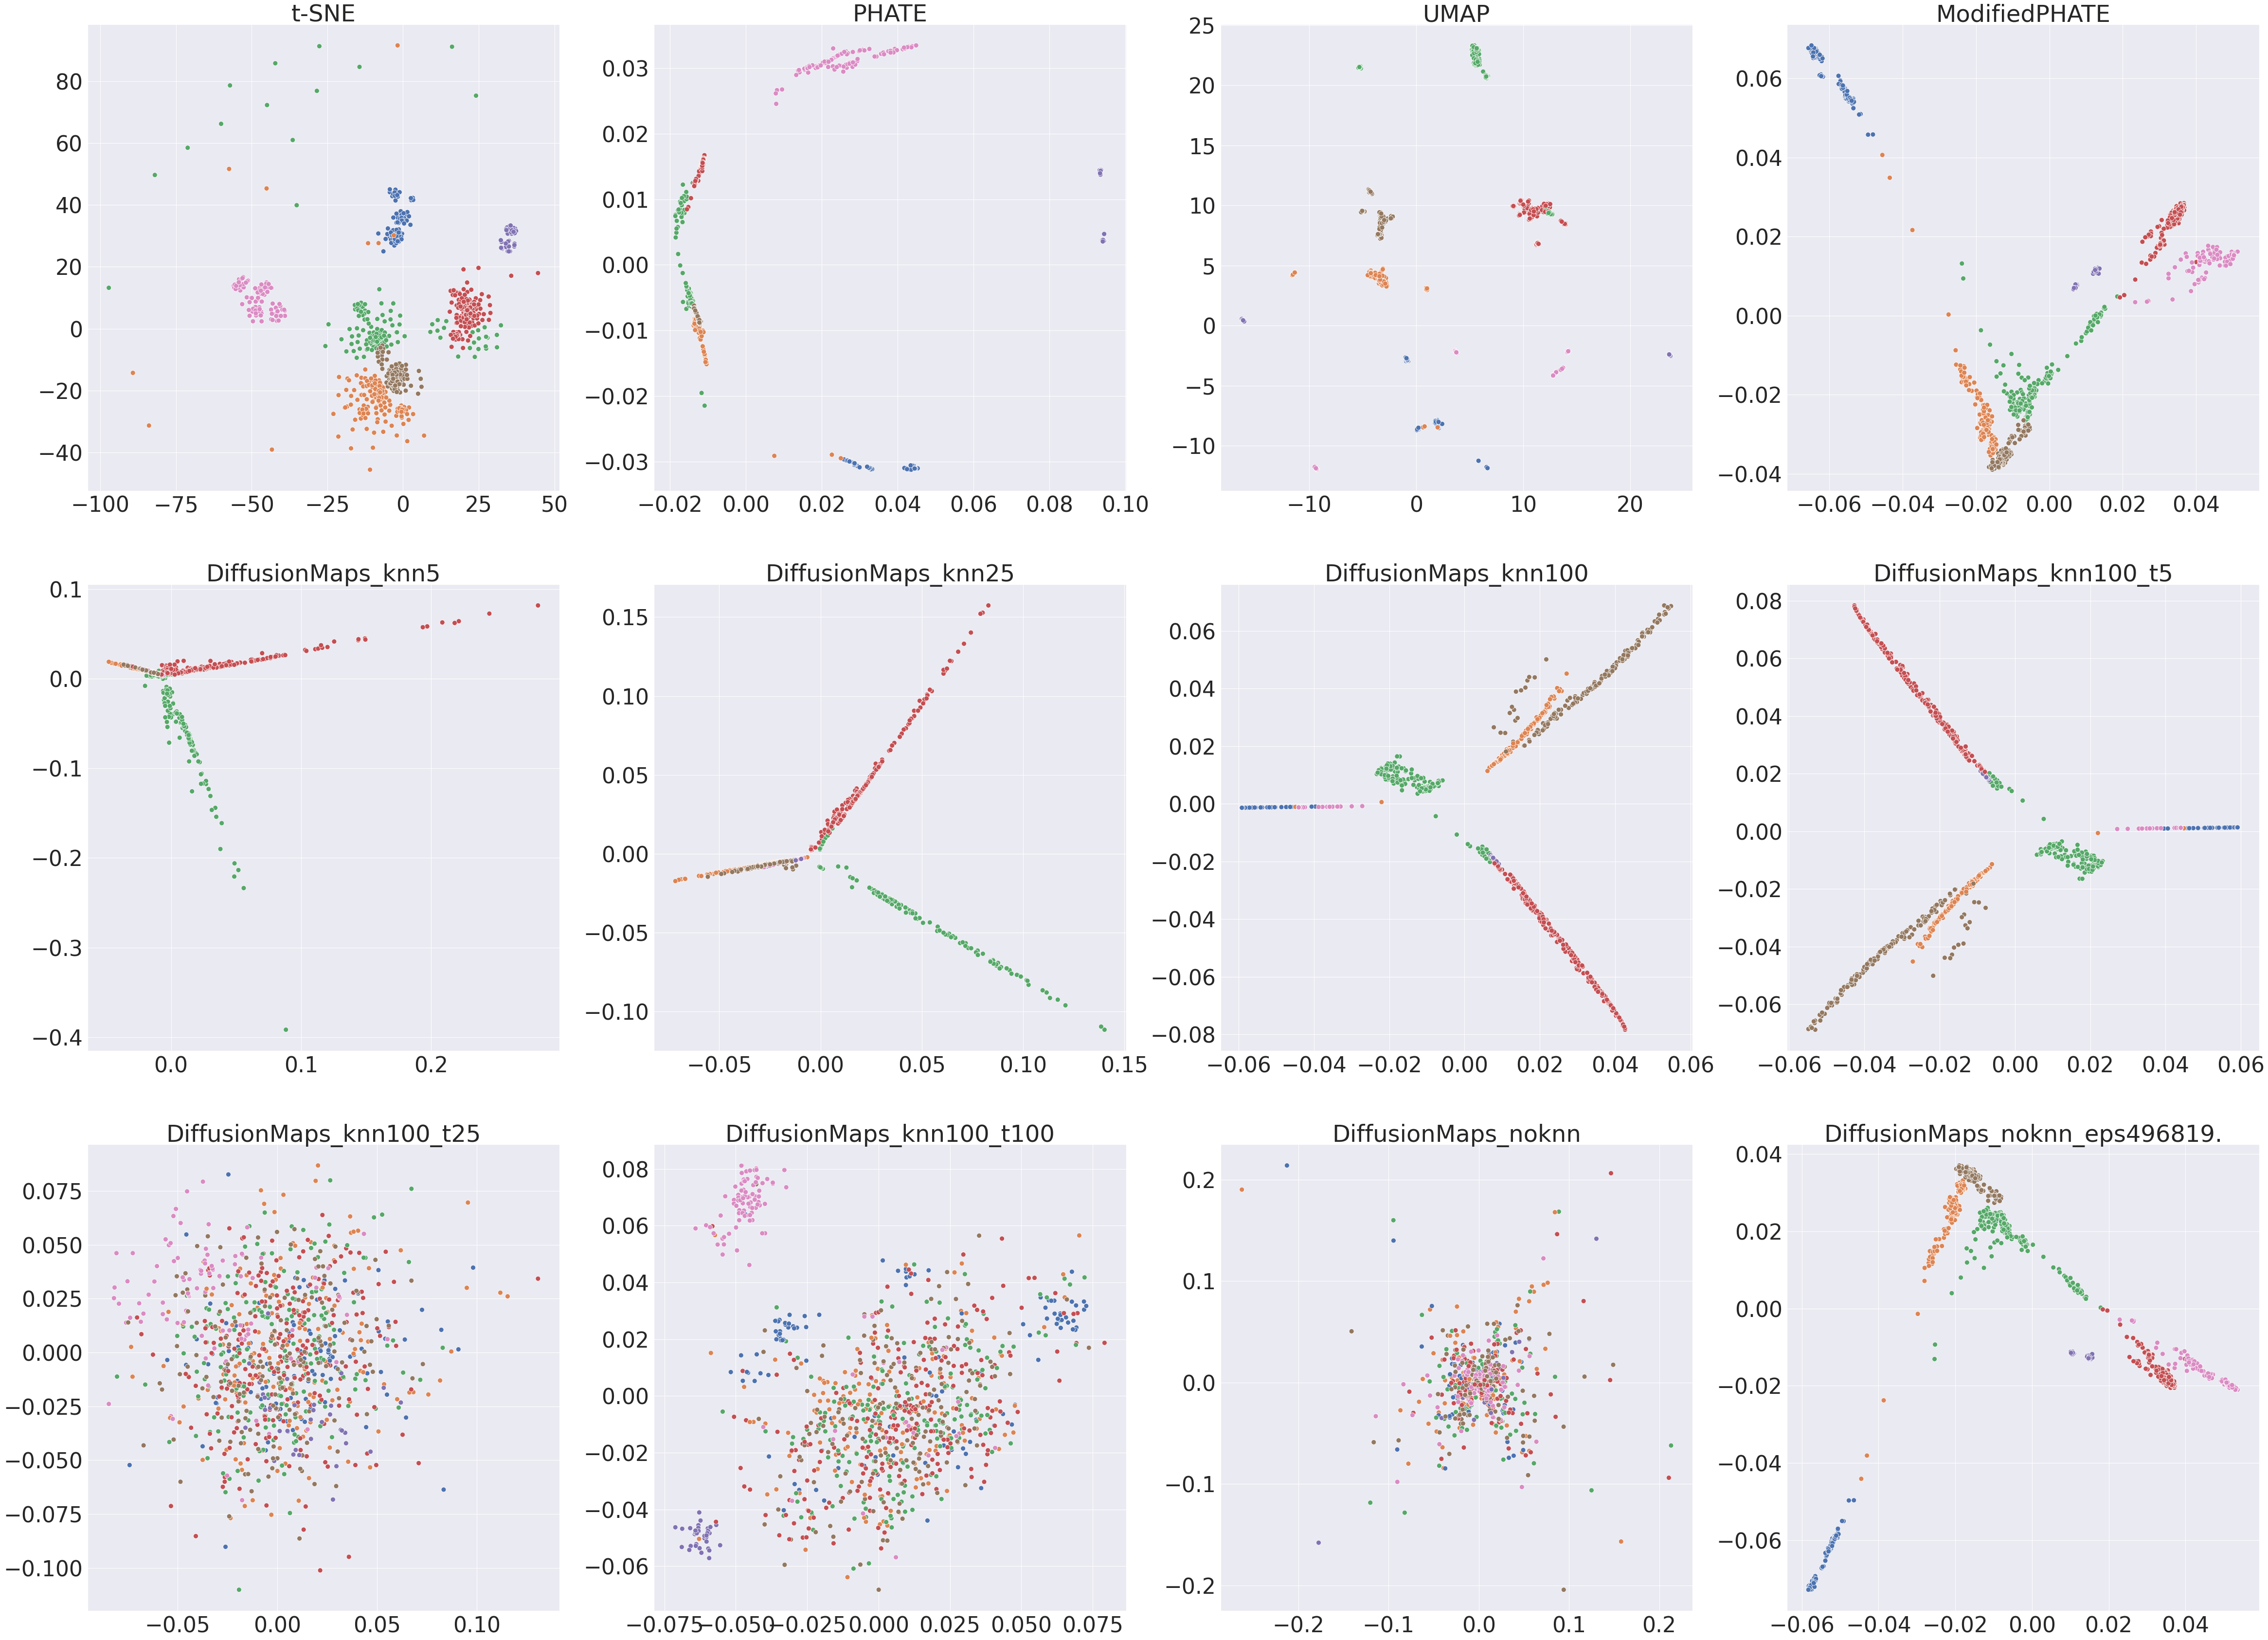

In [6]:
n_methods = len(methods.keys())
sns.set_theme(font_scale=4)
scale = 20
xplot, yplot = get_grid(n_methods)

fig, axes = plt.subplots(xplot, yplot, figsize=(scale*yplot, scale*xplot))

for method, ax in zip(methods.keys(), tqdm(axes.ravel())):
    #print(method, dataset)
    embedding = methods[method].fit_transform(dist)
    plt.sca(ax)
    plt.title(method)
    sns.scatterplot(*embedding[:, :2].T, hue=pops["pop_group"], s=100)
    plt.legend([],[], frameon=False)


In [7]:
methods["DiffusionMaps_noknn"].kernel

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
At = lambda t: np.linalg.matrix_power(methods["DiffusionMaps_knn100_t100"].symmetric_diff_op, t)

In [9]:
At(10) - At(5)

array([[ 1.38293822e-07,  1.38095475e-07,  1.38086959e-07, ...,
        -3.05738607e-08, -3.09412236e-08, -3.90807181e-08],
       [ 1.38095475e-07,  1.37897438e-07,  1.37888968e-07, ...,
        -3.05286908e-08, -3.08997897e-08, -3.90097514e-08],
       [ 1.38086959e-07,  1.37888968e-07,  1.37880417e-07, ...,
        -3.05271461e-08, -3.08981740e-08, -3.90075128e-08],
       ...,
       [-3.05738607e-08, -3.05286908e-08, -3.05271461e-08, ...,
         1.15541699e-07,  1.08113647e-07, -8.09010141e-08],
       [-3.09412236e-08, -3.08997897e-08, -3.08981740e-08, ...,
         1.08113647e-07,  1.04914253e-07, -8.32646251e-08],
       [-3.90807181e-08, -3.90097514e-08, -3.90075128e-08, ...,
        -8.09010141e-08, -8.32646251e-08,  2.36804654e-07]])

In [10]:
methods["DiffusionMaps_knn5"].kernel

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [11]:
k = np.exp(-dist**2/995256.0601802543)
np.size(k[k==1])

1043

In [12]:
k

array([[1.        , 0.69742834, 0.69846485, ..., 0.57980717, 0.58067816,
        0.57905203],
       [0.69742834, 1.        , 0.69539494, ..., 0.57924816, 0.57998196,
        0.57760048],
       [0.69846485, 0.69539494, 1.        , ..., 0.57754073, 0.57976521,
        0.57653482],
       ...,
       [0.57980717, 0.57924816, 0.57754073, ..., 1.        , 0.67124909,
        0.62483607],
       [0.58067816, 0.57998196, 0.57976521, ..., 0.67124909, 1.        ,
        0.62477835],
       [0.57905203, 0.57760048, 0.57653482, ..., 0.62483607, 0.62477835,
        1.        ]])

In [13]:
from scipy.sparse.linalg import eigsh

evals, evecs = eigsh(At, 3)

AttributeError: 'function' object has no attribute 'dtype'

In [ ]:
fig = plt.figure(figsize=(20, 20))
sns.scatterplot(*evecs.T[:2], hue=pops["pop_group"])

In [ ]:
plt.plot(DMs.eigenvalues)

In [ ]:
DMs.eigenvalues

In [ ]:
[1, 2, 3, 4][1:3]

In [ ]:
DMs.symmetric_diff_op

In [ ]:
np.sum(DMs.symmetric_diff_op, axis=0)

In [ ]:
DMs.eigenvalues

In [ ]:
DMs.kernel

In [ ]:
DMs.symmetric_diff_op

In [ ]:
is_sym(DMs.P)

In [ ]:
is_sym(DMs.symmetric_diff_op)

In [ ]:
is_sym(DMs.kernel)

In [ ]:
is_sym = lambda X: np.sum(X - X.T) 

In [ ]:
np.sum(DMs.P != 0) / DMs.P.size

In [ ]:
DMs.degree

In [ ]:
dist

In [ ]:
DMs.kernel

In [ ]:
K = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
d = np.array([1, 2, 3])

K/d

In [ ]:
K @ np.diag(1/d)

In [ ]:
np.diag(d) @ K @ np.diag(1/d)

In [ ]:
DM